In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

paramspath = os.path.join(path, 'compare_linfit_params')


figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
figs46path = os.path.join(figpath, 'FigS15')
hfn.dir_check(figs46path)

figs46panelpaths = os.path.join(figs46path, 'panels')
hfn.dir_check(figs46panelpaths)

In [3]:
areas_sel = ['AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD','VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', ]

In [4]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))

In [5]:
df_frac_s = pd.DataFrame()
for area in areas_sel:
    this_frac = df_frac[['starter', 'target area','area', area]].reset_index(drop = True)
    this_frac['input_area'] = area
    this_frac.columns = ['starter', 'targeted_area','target_area', 'input_fraction', 'area']
    df_frac_s = pd.concat([df_frac_s, this_frac], axis = 0).reset_index(drop = True)

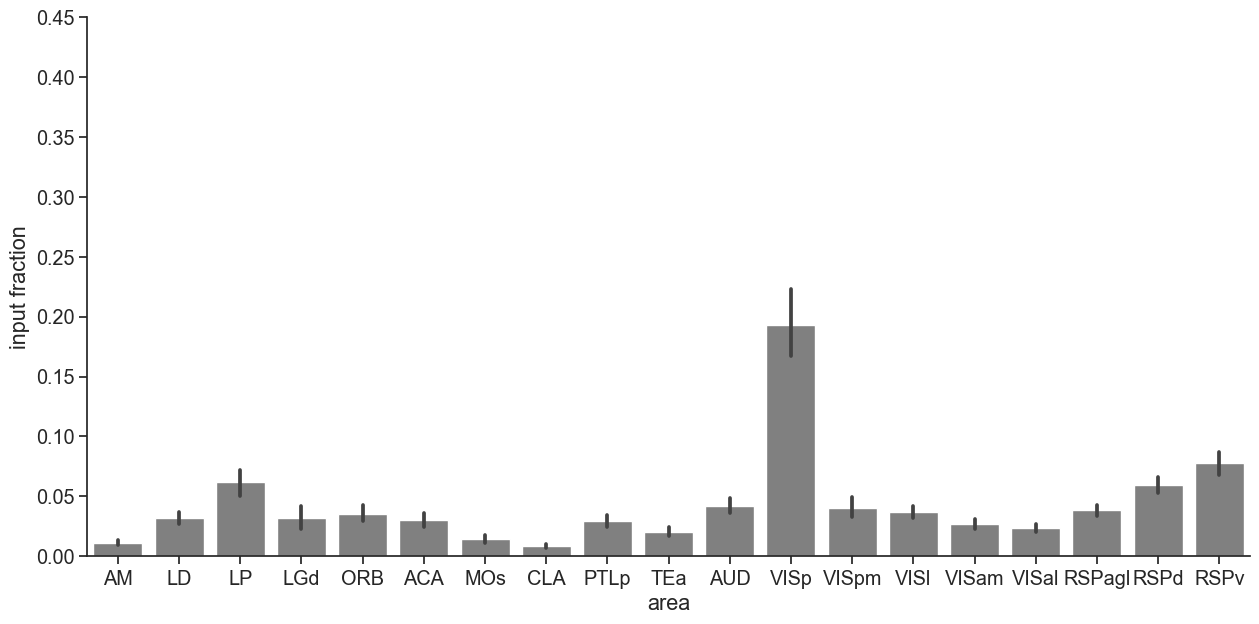

In [6]:
sns.set(font_scale =1.3)
plt.figure(figsize = (15, 7))
sns.set_style("ticks")
sns.barplot(data = df_frac_s,  x = 'area', y ='input_fraction', color = 'grey')
plt.ylim(0, 0.45)
plt.ylabel('input fraction')
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig(os.path.join(figs46panelpaths, 'figS15a.png'),  bbox_inches='tight')
plt.savefig(os.path.join(figs46panelpaths, 'figS15a.eps'),  bbox_inches='tight', format = 'eps')

In [7]:
df_int_all_boot = pd.read_csv(os.path.join(paramspath, 'dfboot_int_all_targets.csv'))

In [8]:
df_int_all_boot = df_int_all_boot[areas_sel]

In [9]:
df_int_all_boot = df_int_all_boot.apply(lambda x: 10**x)

In [10]:
df_frac_per_cell =df_int_all_boot[areas_sel].div(df_int_all_boot.sum(axis = 1),axis = 0 )

In [11]:
int_pars = []

for area in areas_sel:
    int_pars.append({'area':area, 'mean':df_frac_per_cell[area].mean(), 'CI95_low': df_frac_per_cell[area].quantile(0.025), 'CI95_high': df_frac_per_cell[area].quantile(0.975), 'sd' : df_frac_per_cell[area].std()})

In [12]:
int_pars_df = pd.DataFrame(int_pars)

In [13]:
int_pars_df['errm']=int_pars_df['mean']-int_pars_df['CI95_low']
int_pars_df['errp']=int_pars_df['CI95_high']-int_pars_df['mean']

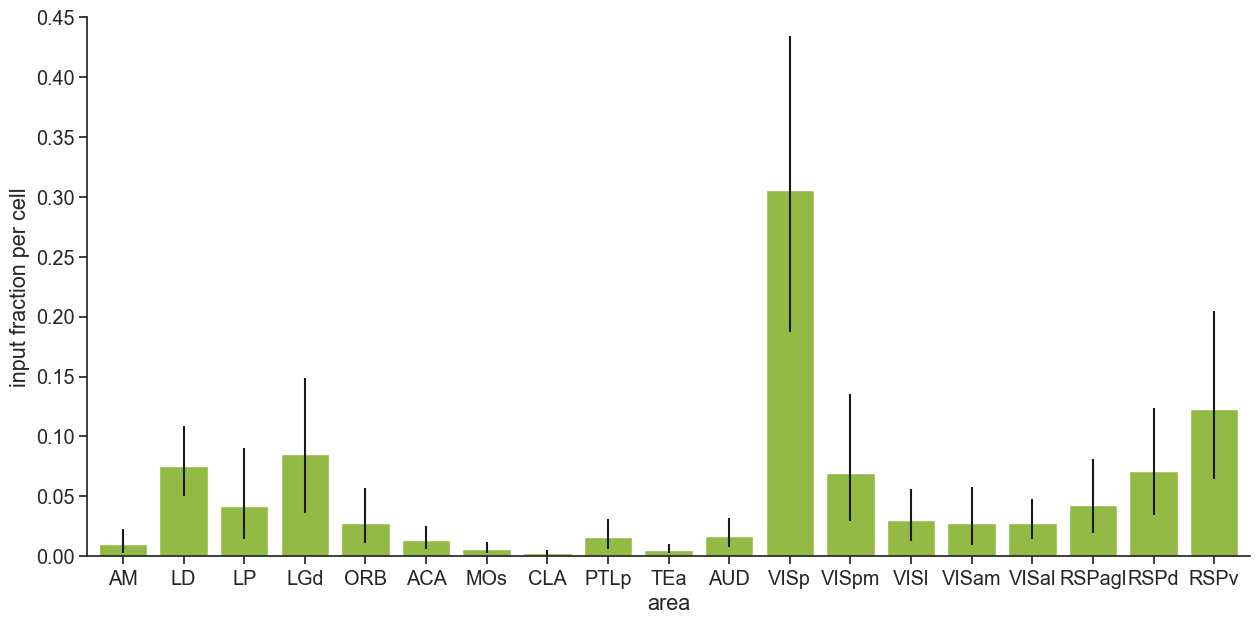

In [14]:
plt.figure(figsize = (15, 7))
sns.set_style("ticks")
sns.barplot(data = int_pars_df,  x = 'area', y ='mean', color = 'yellowgreen')

plt.errorbar(np.arange(int_pars_df.shape[0]), y = int_pars_df['mean'].values, yerr = [int_pars_df['errm'].values,int_pars_df['errp'].values], c= 'k',fmt='none')
plt.margins(x=0.01)
plt.ylabel('input fraction per cell')
plt.ylim(0, 0.45)
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig(os.path.join(figs46panelpaths, 'figS15b.png'),  bbox_inches='tight')
plt.savefig(os.path.join(figs46panelpaths, 'figS15b.eps'),  bbox_inches='tight', format = 'eps')

In [15]:
df_rank_if = pd.DataFrame(df_frac_s.groupby(['area']).mean().sort_values('input_fraction')['input_fraction']).rank()

In [16]:
df_rank_if_pc = int_pars_df[['area', 'mean']].sort_values('mean').set_index('area').rank()

In [17]:
df_allr = pd.concat([df_rank_if , df_rank_if_pc],axis = 1)

In [18]:
df_allr.columns = ['whole-brain', 'per cell']

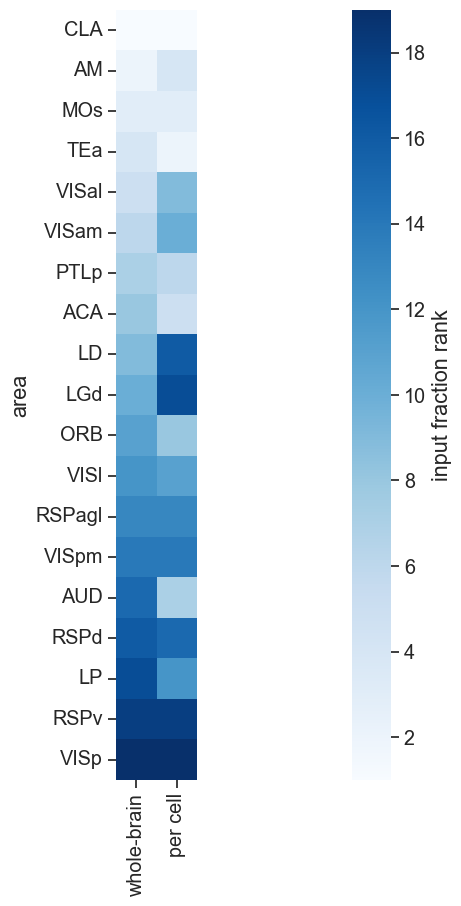

In [19]:
plt.figure(figsize = (40,10))
sns.heatmap(df_allr,square=True, cmap = 'Blues', vmin = df_allr['whole-brain'].min(), vmax = int(df_allr['whole-brain'].max()),cbar_kws={'label': 'input fraction rank'})

plt.savefig(os.path.join(figs46panelpaths, 'figS15c.png'),  bbox_inches='tight')
plt.savefig(os.path.join(figs46panelpaths, 'figS15c.eps'),  bbox_inches='tight', format = 'eps')